# Durchschnittliche Wortanzahl pro Jahr

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('lyrics_clean_utf8.csv',encoding ='utf-8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259793 entries, 0 to 259792
Data columns (total 7 columns):
Unnamed: 0                      259793 non-null int64
song                            259792 non-null object
year                            259793 non-null int64
genre                           259793 non-null object
word_tokenize_no_punctuation    259793 non-null object
word_tokenize_length            259793 non-null int64
word_tokenize_no_stopwords      259793 non-null object
dtypes: int64(3), object(4)
memory usage: 13.9+ MB


In [3]:
df.head()

,Unnamed: 0,song,year,genre,word_tokenize_no_punctuation,word_tokenize_length,word_tokenize_no_stopwords
0,0,ego-remix,2009,Pop,"['oh', 'baby', 'how', 'you', 'doing', 'you', '...",474,"['oh', 'baby', 'know', ""'m"", 'gon', 'na', 'cut..."
1,1,then-tell-me,2009,Pop,"['playin', 'everything', 'so', 'easy', 'it', ""...",270,"['playin', 'everything', 'easy', ""'s"", 'like',..."
2,2,honesty,2009,Pop,"['if', 'you', 'search', 'for', 'tenderness', '...",177,"['search', 'tenderness', ""n't"", 'hard', 'find'..."
3,3,you-are-my-rock,2009,Pop,"['oh', 'oh', 'oh', 'i', 'oh', 'oh', 'oh', 'i',...",555,"['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'verse', ..."
4,4,black-culture,2009,Pop,"['party', 'the', 'people', 'the', 'people', 't...",338,"['party', 'people', 'people', 'party', ""'s"", '..."


## Entfernen von Trennzeichen
Entfernen der CSV Trenzeichen ' und "

In [4]:
df['word_tokenize_no_punctuation'] = df['word_tokenize_no_punctuation'].str.replace("'",'')
df['word_tokenize_no_punctuation'] = df['word_tokenize_no_punctuation'].str.replace('"','')
df['word_tokenize_no_stopwords'] = df['word_tokenize_no_stopwords'].str.replace("'",'')
df['word_tokenize_no_stopwords'] = df['word_tokenize_no_stopwords'].str.replace('"','')
df['word_tokenize_no_stopwords_wordcount'] = df['word_tokenize_no_stopwords'].str.split().str.len()
df.head()

,Unnamed: 0,song,year,genre,word_tokenize_no_punctuation,word_tokenize_length,word_tokenize_no_stopwords,word_tokenize_no_stopwords_wordcount
0,0,ego-remix,2009,Pop,"[oh, baby, how, you, doing, you, know, i, m, g...",474,"[oh, baby, know, m, gon, na, cut, right, chase...",229
1,1,then-tell-me,2009,Pop,"[playin, everything, so, easy, it, s, like, yo...",270,"[playin, everything, easy, s, like, seem, sure...",129
2,2,honesty,2009,Pop,"[if, you, search, for, tenderness, it, is, nt,...",177,"[search, tenderness, nt, hard, find, love, nee...",81
3,3,you-are-my-rock,2009,Pop,"[oh, oh, oh, i, oh, oh, oh, i, verse, 1, if, i...",555,"[oh, oh, oh, oh, oh, oh, verse, 1, wrote, book...",272
4,4,black-culture,2009,Pop,"[party, the, people, the, people, the, party, ...",338,"[party, people, people, party, s, popping, sit...",189


## Zusammenfassen und Beschreiben
describe() gibt zurück:  count: Anzahl der Objekte, mean: Durchschnitt, std: Standartabweichung, min-max: Angabe des wertes bei min, 25%, 50%, 75%, max

### Mit Füllwörtern nach Jahr zusammengefasst
mit describe() alle Lieder des selben Jahres beschrieben

In [5]:
grouped_by_year = df['word_tokenize_length'].groupby(df['year']).describe()
grouped_by_year

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1970,165.0,178.400000,75.835171,27.0,126.00,157.0,215.00,463.0
1971,195.0,191.635897,89.499385,16.0,129.00,180.0,236.00,537.0
1972,190.0,199.042105,116.862458,22.0,126.00,180.0,233.00,923.0
1973,244.0,197.909836,81.011913,18.0,136.00,189.5,239.50,499.0
1974,158.0,221.417722,135.017254,26.0,134.00,195.5,282.50,916.0
1975,142.0,189.633803,100.787360,18.0,127.50,178.5,240.75,562.0
1976,83.0,214.060241,111.119837,39.0,143.50,181.0,247.50,648.0
1977,234.0,221.598291,100.203875,18.0,155.50,213.0,269.75,611.0
1978,187.0,212.096257,117.774942,28.0,142.00,197.0,258.00,1212.0


### Ohne Füllwörtern nach Jahr zusammengefasst
mit describe() alle Lieder des selben Jahres beschrieben

In [6]:
grouped_by_year_no_wordcount = df['word_tokenize_no_stopwords_wordcount'].groupby(df['year']).describe()
grouped_by_year_no_wordcount.head()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1970,165.0,95.357576,43.462200,15.0,65.0,86.0,118.00,239.0
1971,195.0,100.200000,48.763853,11.0,70.0,92.0,121.50,374.0
1972,190.0,108.289474,68.293526,11.0,68.0,95.0,124.00,482.0
1973,244.0,105.512295,46.900866,8.0,73.0,96.0,130.00,297.0
1974,158.0,119.265823,76.521711,9.0,72.0,103.0,147.75,526.0


## Ausgabe der Ergebnisse

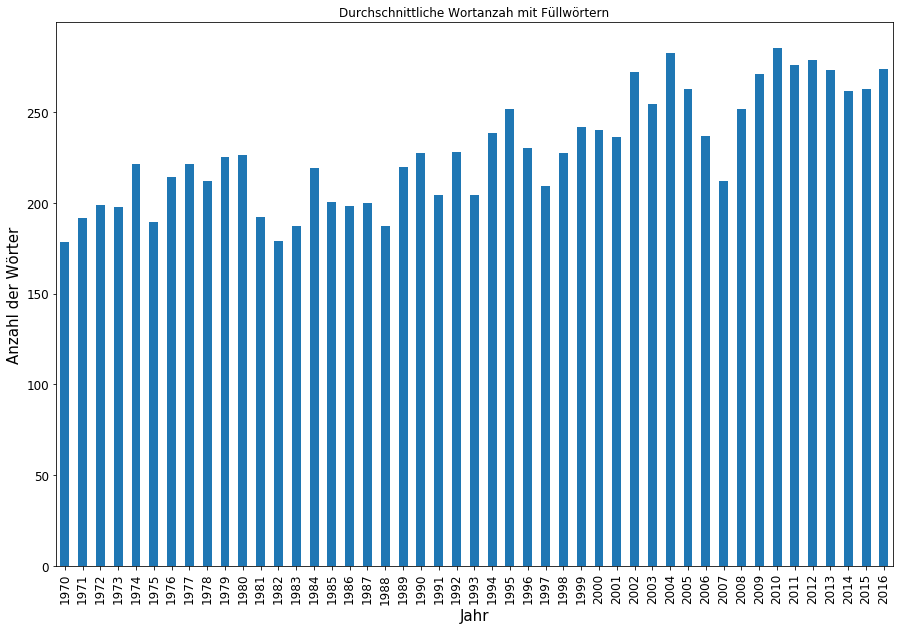

In [7]:
import matplotlib.pyplot as plt
plot_year = grouped_by_year['mean'].plot(kind='bar', title ="Durchschnittliche Wortanzah mit Füllwörtern", figsize=(15, 10), fontsize=12)
plot_year.set_xlabel("Jahr", fontsize=15)
plot_year.set_ylabel("Anzahl der Wörter", fontsize=15)

plt.show()

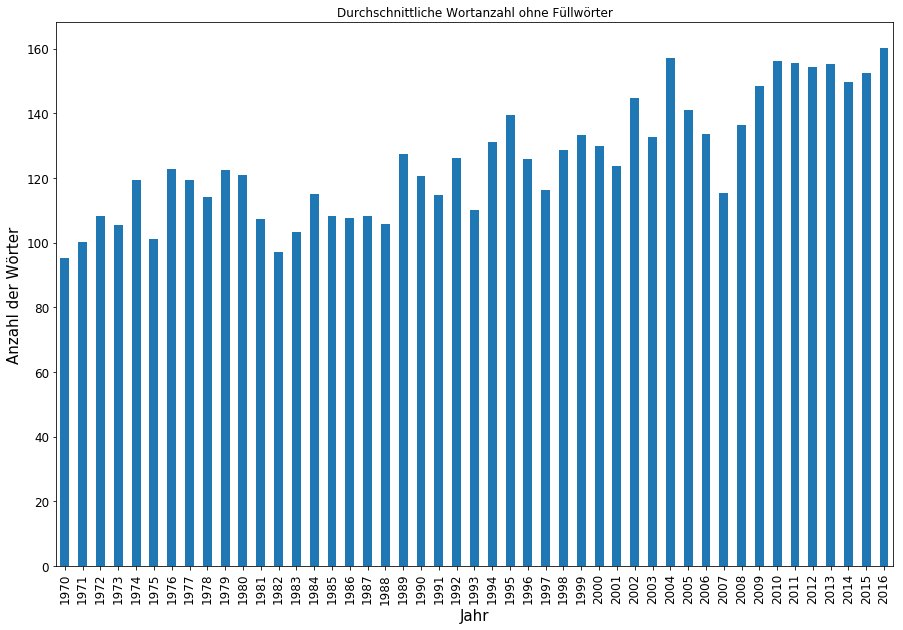

In [11]:
plot_year = grouped_by_year_no_wordcount['mean'].plot(kind='bar' ,title ="Durchschnittliche Wortanzahl ohne Füllwörter", figsize=(15, 10), fontsize=12)
plot_year.set_xlabel("Jahr", fontsize=15)
plot_year.set_ylabel("Anzahl der Wörter", fontsize=15)

plt.show()

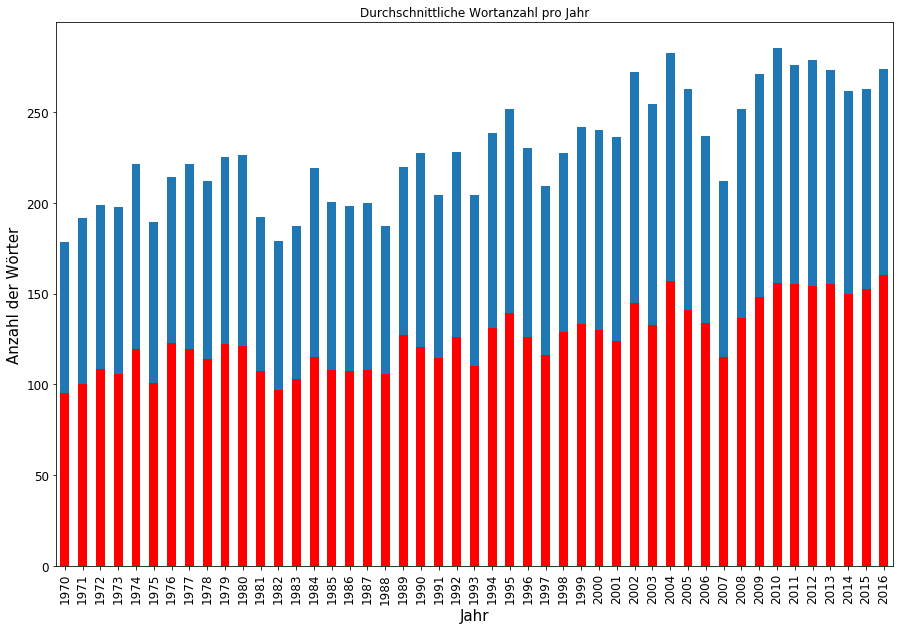

In [9]:
fig = plt.figure()
plot_combine = grouped_by_year['mean'].plot(kind='bar', title ="Durchschnittliche Wortanzahl pro Jahr", figsize=(15, 10), fontsize=12)
plot_combine = grouped_by_year_no_wordcount['mean'].plot(kind='bar',color = 'red' ,title ="Durchschnittliche Wortanzahl pro Jahr", figsize=(15, 10), fontsize=12)
plot_combine.set_xlabel("Jahr", fontsize=15)
plot_combine.set_ylabel("Anzahl der Wörter", fontsize=15)
plt.show()

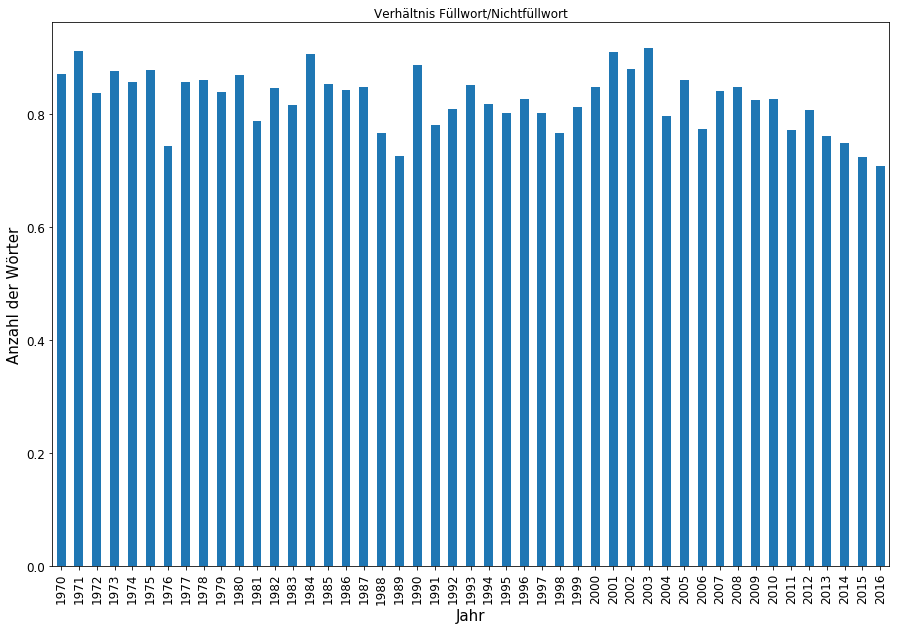

In [10]:
fig = plt.figure()
plot_combine = ((grouped_by_year['mean']-grouped_by_year_no_wordcount['mean'])/grouped_by_year_no_wordcount['mean']).plot(kind='bar', title ="Verhältnis Füllwort/Nichtfüllwort", figsize=(15, 10), fontsize=12)
plot_combine.set_xlabel("Jahr", fontsize=15)
plot_combine.set_ylabel("Anzahl der Wörter", fontsize=15)
plt.show()